In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

In [32]:
# 给出一个随机产生的数据集  这里用sin函数，每隔5个点加一个随机的噪音

def creat_data(n):
    np.random.seed(0)
    X = 5*np.random.rand(n,1)
    Y = np.sin(X).ravel()
    # 随机数个数 每5个 插入一个
    noise_num = int(n/5)
    # 插入噪音随机数，每5个元素一插
    Y[::5] += 3*(0.5 - np.random.rand(noise_num))
    # 返回分组数据 训练集：测试集 = 0.75：0.25
    return cross_validation.train_test_split(X,Y,test_size=0.25,random_state=1)

In [33]:
# 测试回归决策树函数：
def test_DecisionTreeRegressor(*data):
    X_train,X_test,Y_train,Y_test = data
    regr = DecisionTreeRegressor()
    regr.fit(X_train,Y_train)
    
    print('【训练集成绩】Training Score:{0}'.format(regr.score(X_train,Y_train)))
    print('【测试集成绩】Testing  Score:{0}'.format(regr.score(X_test,Y_test)))
    
    
    # 绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    X = np.arange(0.0,5.0,0.01)[:,np.newaxis]
    Y = regr.predict(X)
    
    ax.scatter(X_train,Y_train, label="train sample",c='g')
    ax.scatter(X_test,Y_test, label="test sample",c='r')
    ax.plot(X,Y, label='Predict',linewidth=2,alpha=0.5)
    ax.set_xlabel(r'data')
    ax.set_ylabel(r'target')
    ax.set_title('DecisionTreeRegressor')
    ax.legend(framealpha=0.5)
    plt.show()
    

【训练集成绩】Training Score:0.9999999999801908
【测试集成绩】Testing  Score:0.7891068670888406


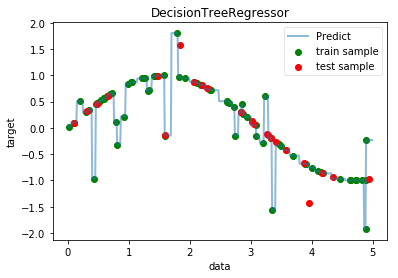

In [34]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(100)
test_DecisionTreeRegressor(X_train,X_test,Y_train,Y_test)

In [35]:
# 检验【随机划分】与【最优划分】的影响
# 测试回归决策树函数：
def test_DTR_splitter(*data):
    X_train,X_test,Y_train,Y_test = data
    
    splitters = ['best','random']
    
    for splitter in splitters :
            regr = DecisionTreeRegressor(splitter=splitter)
            regr.fit(X_train,Y_train)
            print(splitter)
            print('【训练集成绩】Training Score:{0}'.format(regr.score(X_train,Y_train)))
            print('【测试集成绩】Testing  Score:{0}'.format(regr.score(X_test,Y_test)))

In [36]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(100)
test_DTR_splitter(X_train,X_test,Y_train,Y_test)

best
【训练集成绩】Training Score:0.9999999999801908
【测试集成绩】Testing  Score:0.7891068670888406
random
【训练集成绩】Training Score:0.9999999999801908
【测试集成绩】Testing  Score:0.7789887758633913


In [37]:
# 检验决策树深度对拟合的影响：
# 测试回归决策树函数：
def test_DTR_depth(*data,maxdepth):
    X_train,X_test,Y_train,Y_test = data
    
    depths = np.arange(1,maxdepth)
    
    train_score = []
    test_score = []
    
    for depth in depths :
            regr = DecisionTreeRegressor(max_depth=depth)
            regr.fit(X_train,Y_train)
            train_score.append(regr.score(X_train,Y_train))
            test_score.append(regr.score(X_test,Y_test))
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(depths,train_score,label='Training Score')
    ax.plot(depths,test_score, label='Testing Score')
    ax.set_xlabel(r'maxdepth')
    ax.set_ylabel('score')
    ax.set_title('DecisionTreeRegressor')
    ax.legend(framealpha=0.5)
    plt.show()


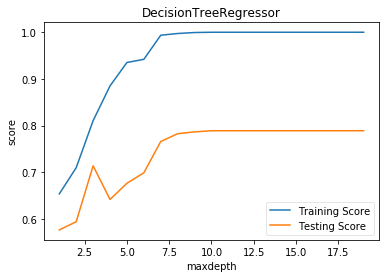

In [39]:
# 开始测试：
X_train,X_test,Y_train,Y_test = creat_data(100)
test_DTR_depth(X_train,X_test,Y_train,Y_test,maxdepth=20)